| Member      | Net ID |
|-------------|--------|
| Gabe Morris | gnm54  |
| Colin Young | ccy33  |
| Wyatt Davis | wd298  |
| Alaa Chriat | aec652 |

In [1]:
# Notebook Preamble
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

# Parameters

\begin{center}
\includegraphics{images/fig1} \\
Figure 1: Baja Model
\end{center}

| Property | Value |
|----------|-------|
| $W_1$    | ?     |
| $W_2$    | ?     |
| $k_{e1}$ | ?     |
| $k_{e2}$ | ?     |
| $L_1$    | ?     |
| $L_2$    | ?     |
| $I_G$    | ?     |

The values $W_1$ and $W_2$ were estimated to be ? and ? respectfully. This information was used to calculate the equivalent stiffness in the front and rear suspensions,

$$k_{e1}=\frac{W_1}{\Delta x}$$
$$k_{e2}=\frac{W_2}{\Delta x}$$

## Calculating $I_G$
The pitch natural frequency $\omega_{n2}^2$ (refers to the motion caused by a changing $\theta$) was calculated by obtaining data from an accelerometer below. This data was obtained by producing a rocking motion with the accelerometer at the end of the vehicle. Similarly, the bounce natural frequency $\omega_{n1}^2$ (refers to motion caused by vertical bouncing - changing $x$) was obtained from the accelerometer data below. The accelerometer was placed close to the center of gravity and vertical, bouncing motion was produced on the vehicle.

*Show plots here and calculations*

The mass moment of inertia may be calculated by obtaining the moment equation,

$$I_G\ddot{\theta}=-k_{e1}(y_1-x+L_1\theta)L_1+k_{e2}(y_2-x-L_2\theta)L_2$$

Since the data was obtained on a level surface and $x$ was very small, the equation simplifies to

$$I_G\ddot{\theta}=-k_{e1}L_1^2\theta-k_{e2}L_2^2\theta$$
$$I_Gs^2\theta=-k_{e1}L_1^2\theta-k_{e2}L_2^2\theta$$

Plugging in the pitch natural frequency in for $s$ and solving for $I_G$ (only interested in magnitude),

$$I_G=\frac{k_{e1}L_1^2+k_{e2}L_2^2}{\omega_{n2}^2}$$

*Calculate the moment of inertia*

# Equations of Motion
Summing the moments and forces in the vertical direction,

$$\begin{cases}
m\ddot{x}=k_{e1}(y_1-x+L_1\theta)+k_{e2}(y_2-x-L_2\theta) \\
I_G\ddot{\theta}=-k_{e1}(y_1-x+L_1\theta)L_1+k_{e2}(y_2-x-L_2\theta)L_2
\end{cases}$$

In the laplace space,

$$\begin{cases}
ms^2X(s)=k_{e1}(Y_1(s)-X(s)+L_1\theta(s))+k_{e2}(Y_2(s)-X(s)-L_2\theta(s)) \\
I_Gs^2\theta(s)=-k_{e1}(Y_1(s)-X(s)+L_1\theta(s))L_1+k_{e2}(Y_2(s)-X(s)-L_2\theta(s))L_2
\end{cases}$$

## Natural Frequencies
The system may be placed in the matrix form with $y_1$ and $y_2$ being set equal to zero because the free response is the main interest in determining the natural frequencies.

In [2]:
# Input all measured quantities here
# For now, these are the quantities from example in the book
k1 = 1.6e4
k2 = 2.5e4
L1 = 1.5
L2 = 1.1
m = 730
IG = 1350

# Putting the system in the matrix form
# Defining symbols (underscore denotes symbolic variable)
L1_, L2_ = sp.symbols('L_1 L_2')
x_, k1_, k2_, IG_, s_, m_ = sp.symbols('x k_1 k_2 I_G s m')
X_, theta_ = sp.symbols(r'X \theta')

eq1 = sp.Eq(m_*s_**2*X_, k1_*(-X_ + L1_*theta_) + k2_*(-X_ - L2_*theta_))
eq1
eq2 = sp.Eq(IG_*s_**2*theta_, -k1_*(-X_ + L1_*theta_)*L1_ + k2_*(-X_ - L2_*theta_)*L2_)
eq2

M_ = sp.linear_eq_to_matrix([eq1, eq2], (X_, theta_))[0]
X_matrix = sp.Matrix([X_, theta_])
sp.Eq(sp.MatMul(M_, X_matrix), sp.Matrix([0, 0]))

Eq(X*m*s**2, k_1*(L_1*\theta - X) + k_2*(-L_2*\theta - X))

Eq(I_G*\theta*s**2, -L_1*k_1*(L_1*\theta - X) + L_2*k_2*(-L_2*\theta - X))

Eq(Matrix([
[k_1 + k_2 + m*s**2,                 -L_1*k_1 + L_2*k_2],
[-L_1*k_1 + L_2*k_2, I_G*s**2 + L_1**2*k_1 + L_2**2*k_2]])*Matrix([
[     X],
[\theta]]), Matrix([
[0],
[0]]))

The expanded matrix is,

In [3]:
# Expanding the matrix symbolically
poly_ = M_.det()
poly_.collect(s_)

# Getting a numerical polynomial
poly = poly_.subs([
    (L1_, L1),
    (IG_, IG),
    (m_, m),
    (L2_, L2),
    (k1_, k1),
    (k2_, k2)
])
poly

display(Latex('Roots/Natural Frequencies:'))
roots = sp.roots(poly)
roots_keys = list(roots.keys())
nat_freq = [abs(sp.im(roots_keys[0])), abs(sp.im(roots_keys[-1]))]
roots_numpy = np.float64(nat_freq)
for root in roots:
    display(root)

I_G*m*s**4 + L_1**2*k_1*k_2 + 2*L_1*L_2*k_1*k_2 + L_2**2*k_1*k_2 + s**2*(I_G*k_1 + I_G*k_2 + L_1**2*k_1*m + L_2**2*k_2*m)

985500*s**4 + 103712500.0*s**2 + 2704000000.0

<IPython.core.display.Latex object>

-6.90068060114689*I

6.90068060114689*I

-7.59072228952376*I

7.59072228952376*I

## Mode Ratio $\frac{X}{\theta}$
The mode ratio $\frac{X}{\theta}$ may be found using the bounce equation (first equation in the systems above),

In [4]:
# Finding the mode ratio
T_ = sp.Symbol('T')
w_ = sp.Symbol(r'\omega')

sol = sp.solve(eq1.subs(X_, T_*theta_), T_)[0]
sp.Eq(X_/theta_, sol)

sol_num = sol.subs([(L1_, L1), (L2_, L2), (k1_, k1), (k2_, k2), (m_, m)])
sp.Eq(X_/theta_, sol_num)

sol_omega = sol_num.subs(s_, w_*sp.I)
sp.Eq(X_/theta_, sol_omega)

Eq(X/\theta, (L_1*k_1 - L_2*k_2)/(k_1 + k_2 + m*s**2))

Eq(X/\theta, -3500.0/(730*s**2 + 41000.0))

Eq(X/\theta, -3500.0/(41000.0 - 730*\omega**2))

Now we can calculate the mode shape based on the system's natural frequencies and plot over a range of frequencies.

In [5]:
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr'
# Getting the mode shapes
# Units are length
mode1 = sol_omega.subs(w_, nat_freq[0]).n()
mode1
mode2 = sol_omega.subs(w_, nat_freq[1]).n()
mode2

-0.561091364368354

3.29592502385955

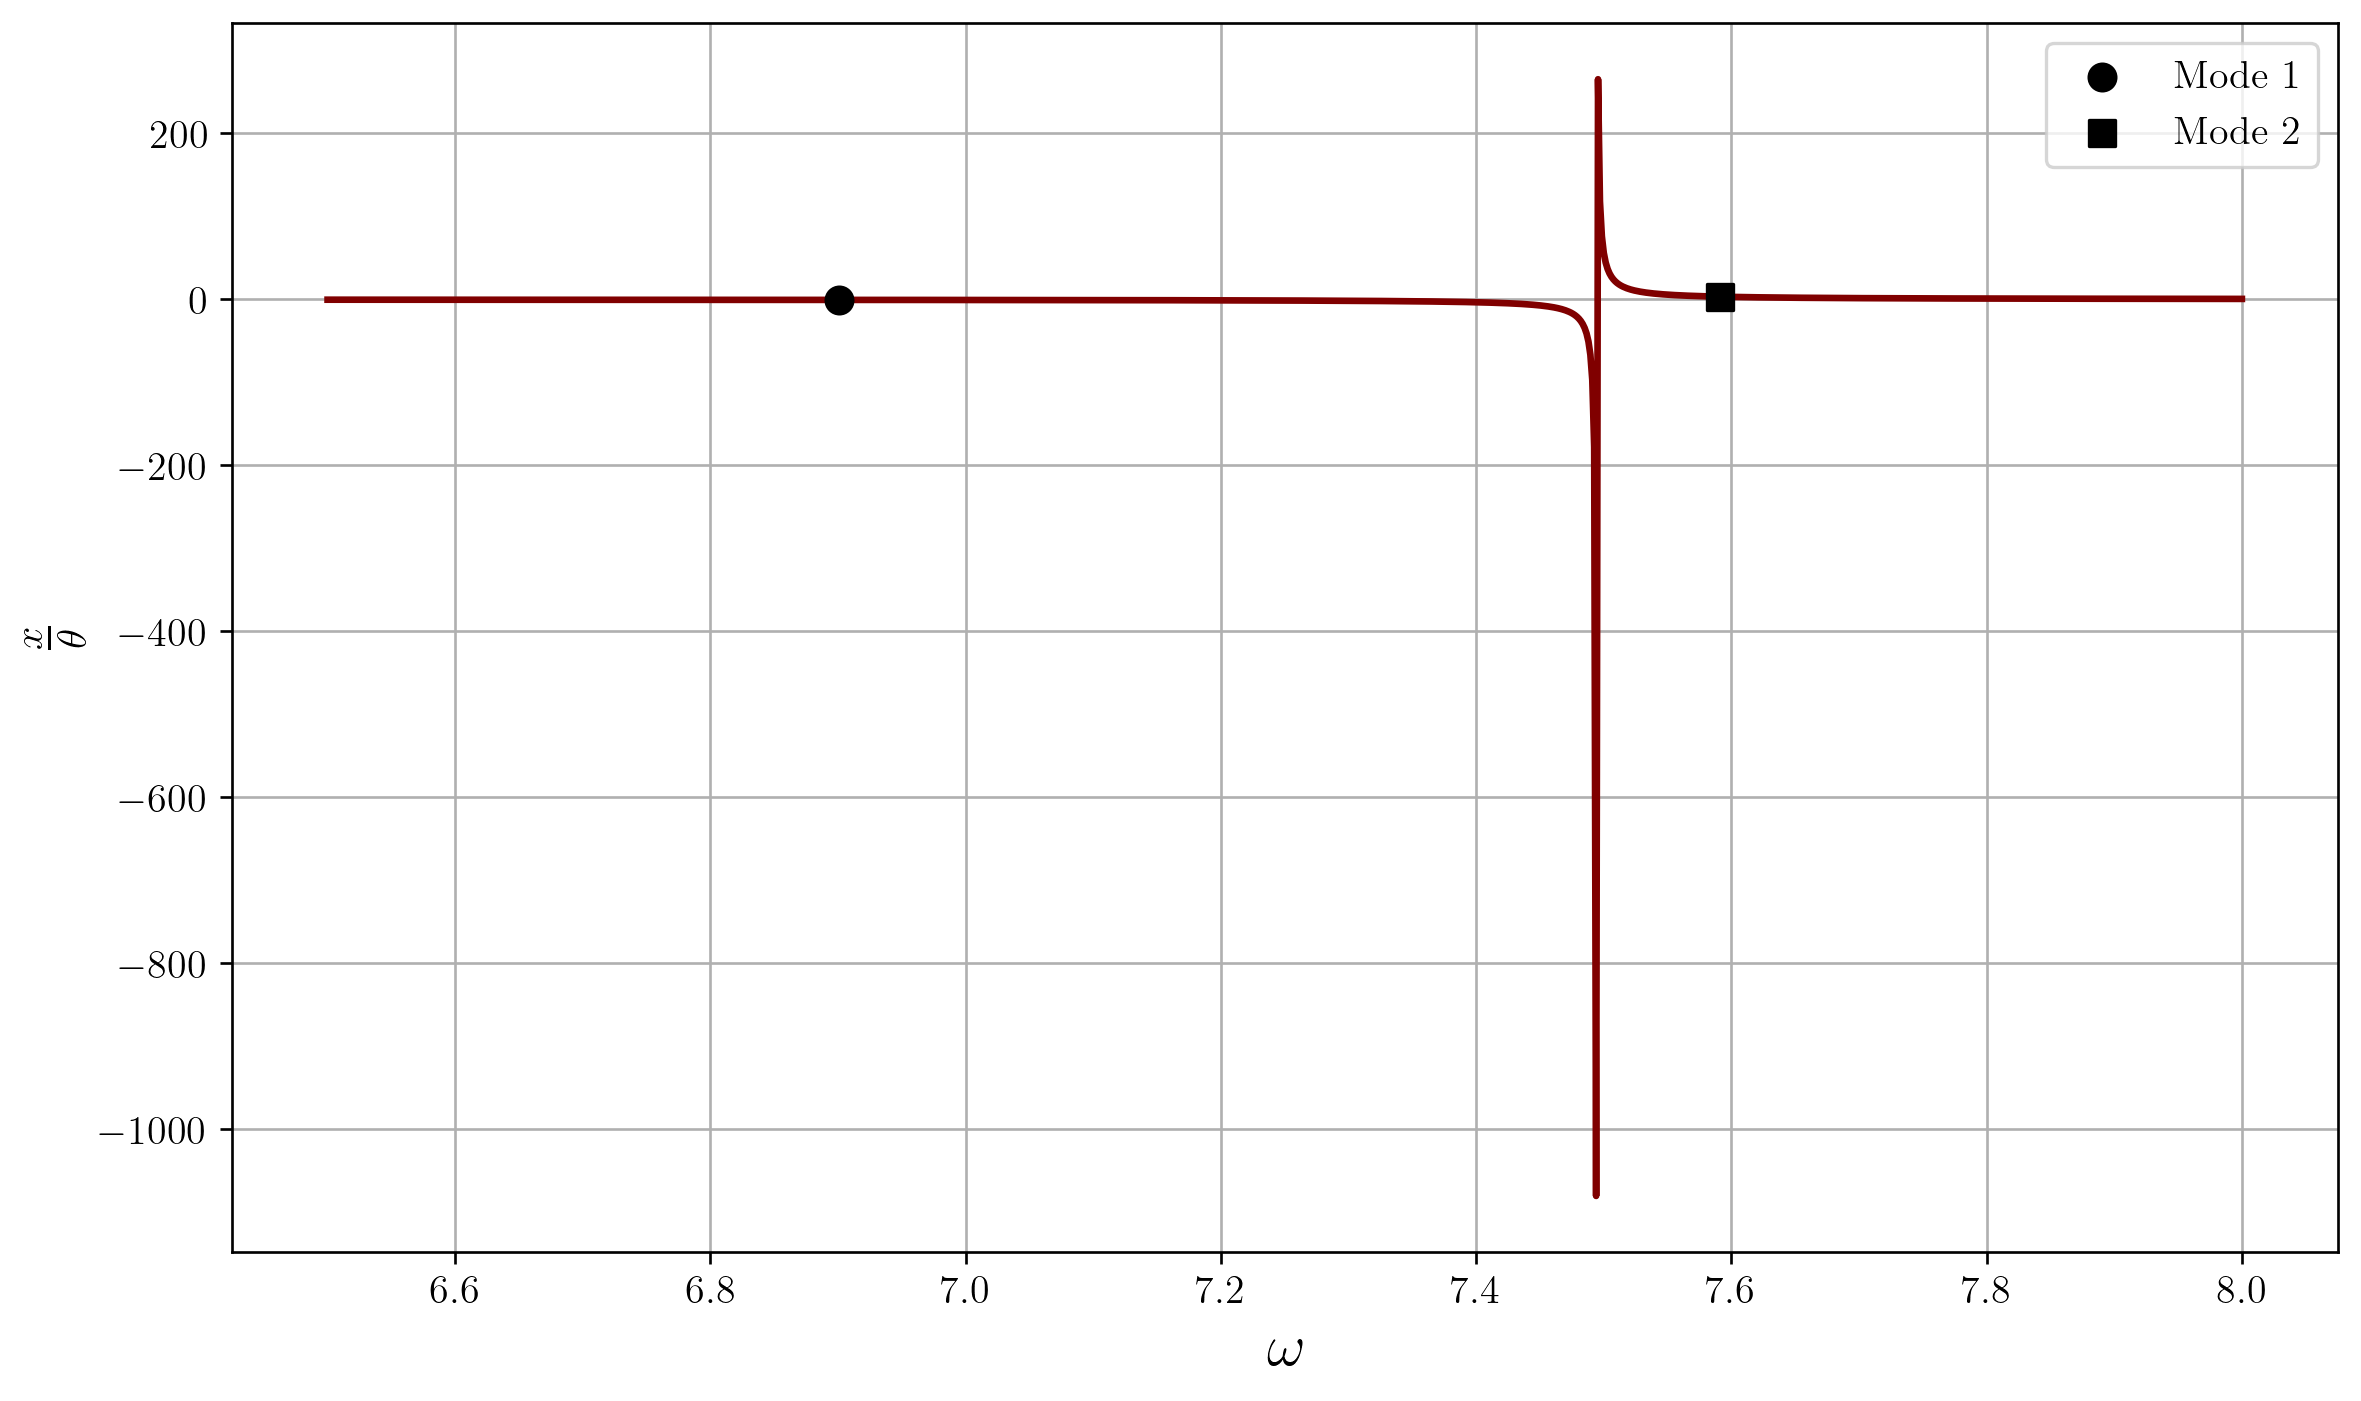

In [6]:
# Getting a plot
nat1, nat2 = roots_numpy
mode_lamb = sp.lambdify(w_, sol_omega, modules='numpy')
w = np.linspace(6.5, 8, 1000)

plt.plot(w, mode_lamb(w), zorder=2)
plt.scatter(nat1, np.float64(mode1), marker='o', label='Mode 1', zorder=3, color='black')
plt.scatter(nat2, np.float64(mode2), marker='s', label='Mode 2', zorder=3, color='black')
plt.legend()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{x}{\theta}$')
plt.show()

*Comment on the values. A positive value means that the node is behind the vehicle and vice versa. A larger value means that the mode is predominantly a bounce motion since $x>\theta$ and vice versa. We want the bounce to be behind the rear axle and the pitch value to be near the front axle. See more on page 847.*